In [361]:
import copy
from tabulate import tabulate


def factorial(n):
    product = 1
    for i in range(2, n + 1):
        product *= i
    return product


def build_equation_sys(x_values: list, y_values: list, exp: int, a: float):
    equation_sys = [[1] * (exp + 1) for _ in range(exp)]
    for i in range(exp):
        for j in range(exp - 1):
            equation_sys[i][j] = x_values[i]**(exp - j - 1)
        equation_sys[i][exp] = y_values[i] - a*x_values[i]**exp
    return equation_sys


def gauss_jordan(a: list[list[float]]):
    a = copy.deepcopy(a)
    n = len(a)
    for i in range(n):
        if a[i][i] == 0:
            for j in range(i + 1, n):
                if a[j][i] != 0:
                    a[i], a[j] = a[j], a[i]
                    break
                else:
                    raise ValueError("The system has no unique solution")
        for j in range(n):
            if i != j:
                ratio = a[j][i] / a[i][i]
                for k in range(n + 1):
                    a[j][k] = a[j][k] - ratio * a[i][k]
    for i in range(n):
        a[i][n] = a[i][n] / a[i][i]
        a[i][i] = 1
    return a


def print_table(*data: list[list], title="", headers: list[str] = [], horizontal=False):
    aux_data = []
    if horizontal:
        for row in data:
            aux_data.append(row)
    else:
        max_len = max([len(row) for row in data])
        for j in range(max_len):
            row = []
            for i in range(len(data)):
                if j < len(data[i]):
                    row.append(data[i][j])
            aux_data.append(row)
    
    if (title != ""):
        print("│" + title)
    
    if horizontal:
        print(tabulate(aux_data, tablefmt="simple_grid"))
    else:
        print(tabulate(aux_data, headers=headers, tablefmt="simple_grid"))


def format_coefficient(coefficient: float):
    if coefficient % 1 == 0:
        return str(int(coefficient))
    return str(coefficient)


def format_term(coefficient: float, exp: int):
    if exp == 0:
        return format_coefficient(coefficient)
    elif exp == 1 and coefficient == 1:
        return "x"
    elif exp == 1 and coefficient != 1:
        return format_coefficient(coefficient) + "x"
    elif exp != 1 and coefficient == 1:
        return "x^" + str(exp)
    else:
        return format_coefficient(coefficient) + "x^" + str(exp)


def linspace(a: float, b: float, space=50):
    if space < 2:
        raise ValueError("space must be greater than 1")
    step = (b - a) / (space - 1)
    return [a + i * step for i in range(space)]

In [362]:
import math
import matplotlib.pyplot as plt


def interpolate(x_values: list[float], y_values: list[float], plot_range: range(-5, 5)):
    diffs = y_values.copy()
    diffs_matrix = []
    exp = 0
    diffs_length = len(y_values)
    while diffs_length > 1:
        exp += 1
        diffs_length -= 1
        for i in range(diffs_length):
            diffs[i] = diffs[i + 1] - diffs[i]
        diffs.pop()
        diffs_matrix.append(diffs.copy())
        if diffs.count(diffs[0]) == len(diffs):
            break

    # Get coefficients of polynomial function
    A = diffs_matrix[exp-1][0] / factorial(exp)
    coefficients = [0] * (exp + 1)
    coefficients[0] = A
    equation_sys = build_equation_sys(x_values, y_values, exp, A)
    solved_equation_sys = gauss_jordan(equation_sys)
    for i in range(exp):
        coefficients[i + 1] = solved_equation_sys[i][exp]

    def f(x):
        result = 0
        for i in range(exp + 1):
            result += coefficients[i]*x**(exp - i)
        return result

    # Print input x and y values
    print_table(x_values, y_values, title="Input values", headers=["x", "y"])
    print("\nSOLUTION:")

    # Print differences
    diff_headers = ["y"]
    for i in range(1, exp + 1):
        diff_headers.append(f"d{i}")
    print_table(y_values, *diffs_matrix, title="Differences", headers=diff_headers)

    print(f"a = {format_coefficient(diffs_matrix[exp-1][0])}/{exp}! = {A}\n")

    print_table(*equation_sys, title="Augmented matrix (system of equations)", horizontal=True)
    print_table(*solved_equation_sys, title="Solved augmented matrix", horizontal=True)

    # Print coefficients
    INITIAL_LETTER_UNICODE = ord("a")  # 97
    for i, coefficient in enumerate(coefficients):
        print(f"{chr(INITIAL_LETTER_UNICODE + i)} = {coefficient}")

    # Print polynomial function
    current_exp = exp
    print("f(x) = " + format_term(coefficients[0], current_exp), end="")
    for i in range(1, len(coefficients)):
        current_exp -= 1
        if coefficients[i] == 0:
            continue
        term = format_term(coefficients[i], current_exp)
        if term.startswith("-"):
            print(" - " + term[1:], end="")
        else:
            print(" + " + term, end="")
    print()

    # Print f(x) values
    fy_values = [0] * len(plot_range)
    for i, x in enumerate(plot_range):
        try:
            fy_values[i] = f(x)
        except Exception:
            fy_values[i] = math.nan
    fx_values = list(plot_range)
    print_table(fx_values, fy_values ,headers=["x", "f(x)"])

    # Plot f(x) values
    PLOT_SPACE = linspace(plot_range.start, plot_range.stop - 1)

    f_plot_values = [0] * len(PLOT_SPACE)
    x_plot_values = [0] * len(PLOT_SPACE)
    for i, x in enumerate(PLOT_SPACE):
        x_plot_values[i] = x
        f_plot_values[i] = f(x)

    plt.plot(x_plot_values, f_plot_values)
    plt.scatter(x_values, y_values, c="red")

│Input values
┌─────┬───────┐
│   x │     y │
├─────┼───────┤
│   0 │   1   │
├─────┼───────┤
│   1 │   9.5 │
├─────┼───────┤
│   2 │  43   │
├─────┼───────┤
│   3 │ 122.5 │
├─────┼───────┤
│   4 │ 269   │
└─────┴───────┘

SOLUTION:
│Differences
┌───────┬───────┬──────┬──────┐
│     y │    d1 │   d2 │   d3 │
├───────┼───────┼──────┼──────┤
│   1   │   8.5 │   25 │   21 │
├───────┼───────┼──────┼──────┤
│   9.5 │  33.5 │   46 │   21 │
├───────┼───────┼──────┼──────┤
│  43   │  79.5 │   67 │      │
├───────┼───────┼──────┼──────┤
│ 122.5 │ 146.5 │      │      │
├───────┼───────┼──────┼──────┤
│ 269   │       │      │      │
└───────┴───────┴──────┴──────┘
a = 21/3! = 3.5

│Augmented matrix (system of equations)
┌───┬───┬───┬────┐
│ 0 │ 0 │ 1 │  1 │
├───┼───┼───┼────┤
│ 1 │ 1 │ 1 │  6 │
├───┼───┼───┼────┤
│ 4 │ 2 │ 1 │ 15 │
└───┴───┴───┴────┘
│Solved augmented matrix
┌───┬───┬───┬───┐
│ 1 │ 0 │ 0 │ 2 │
├───┼───┼───┼───┤
│ 0 │ 1 │ 0 │ 3 │
├───┼───┼───┼───┤
│ 0 │ 0 │ 1 │ 1 │
└───┴───┴───┴──

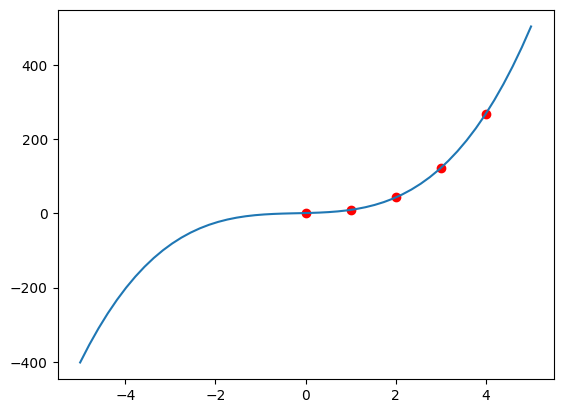

In [363]:
# Test for real values
# Y_VALUES = [1, 4.5, 15, 32.5, 57]
Y_VALUES = [1, 9.5, 43, 122.5, 269]
X_VALUES = list(range(len(Y_VALUES)))
PLOT_RANGE = range(-5, 6)
interpolate(X_VALUES, Y_VALUES, PLOT_RANGE)